**Trinidad, Cyla Dendeyl M.**

**CS 3A**

**Mr. Bernardino**

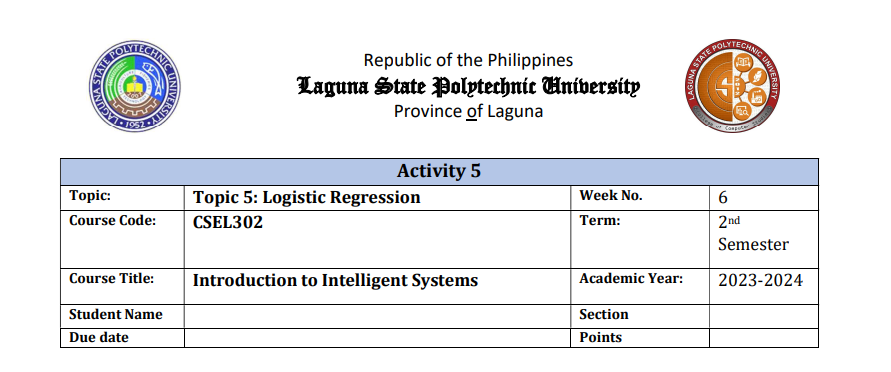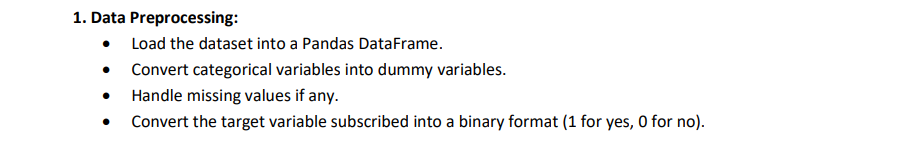

**Assessment Task 5: Bank Customer**

**Objective:**
Predict whether a customer will subscribe to a term deposit based on their demographic and account information using logistic regression.

# **1. Data Preprocessing:**


**import libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

**Load the dataset**

In [ ]:
data = pd.read_csv('BankCustomerData.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Convert Catergorical Variables**

In [ ]:
df_dummies = pd.get_dummies(data, drop_first=True)

**Handle missing values if any**

In [ ]:
df_dummies.isna().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other         0


# **2. Feature Selection:**

**Decide which features to include in the model. You might exclude highly correlated features to avoid multicollinearity**

In [ ]:
X = df_dummies.drop(['term_deposit_yes'],axis=1)
Y = df_dummies['term_deposit_yes']

# **3. Data Splitting:**

**Split the dataset into training and testing sets (typically a 70-30 or 80-20 split).**

In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **4. Model Training:**

**Train a logistic regression model on the training set.**

In [ ]:
model = LogisticRegression()

model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_pred = model.predict(X_test)

# **5. Model Evaluation:**

**Evaluate the model's performance on the testing set using metrics such as accuracy, precision, recall, F1-score, and the confusion matrix**

In [ ]:
accuracy = accuracy_score(Y_test,Y_pred)
conf_matrix = confusion_matrix(Y_test,Y_pred)
class_report = classification_report(Y_test,Y_pred)

print(f'Accuracy          :   {accuracy}')
print(f'Confusion Matrix  :   {conf_matrix}')
print(f'Class Report      :\n   {class_report}')

Accuracy          :   0.9129924953095685
Confusion Matrix  :   [[7615  113]
 [ 629  171]]
Class Report      :
                 precision    recall  f1-score   support

           0       0.92      0.99      0.95      7728
           1       0.60      0.21      0.32       800

    accuracy                           0.91      8528
   macro avg       0.76      0.60      0.63      8528
weighted avg       0.89      0.91      0.89      8528



# **6. Conclusion**

**Summarize the model's performance and discuss any insights or implications for the bank's marketing strategies.**

The model performance provides valuable insights for the bank’s marketing team to optimize their efforts and enhance subscription rates. Accurary with 91.